# **Predicción del precio de las casas con regresión lineal Simple y Multiple**

Este es un ejemplo sencillo de análisis de la relación entre variables, utilizando la regresión lineal desde un efoque estadístico.

--Se analizaran las métricas estadísticas obtenidas del informe OLS para evaluar el rendimiento del modelo y determinar la significancia o influencia de las variables.--

Para este caso se ha utilizado el data set: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data


# 1. Cargar los datos

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

Para el estudio de este caso solo se toman en cuenta algunas areas del terreno/vivienda, para determinar si es un factor determinante sobre el precio de las casas:

In [51]:
# se cargan las variables a considerar del dataset

df = pd.read_csv("/content/train.csv", usecols=['SalePrice', 'LotArea', 'GarageArea', 'GrLivArea', 'TotalBsmtSF'])

#se visualiza una muestra de los datos e información adicional
print(df.head())
print('\n')
print(df.describe().round(2))

   LotArea  TotalBsmtSF  GrLivArea  GarageArea  SalePrice
0     8450          856       1710         548     208500
1     9600         1262       1262         460     181500
2    11250          920       1786         608     223500
3     9550          756       1717         642     140000
4    14260         1145       2198         836     250000


         LotArea  TotalBsmtSF  GrLivArea  GarageArea  SalePrice
count    1460.00      1460.00    1460.00     1460.00     1460.0
mean    10516.83      1057.43    1515.46      472.98   180921.2
std      9981.26       438.71     525.48      213.80    79442.5
min      1300.00         0.00     334.00        0.00    34900.0
25%      7553.50       795.75    1129.50      334.50   129975.0
50%      9478.50       991.50    1464.00      480.00   163000.0
75%     11601.50      1298.25    1776.75      576.00   214000.0
max    215245.00      6110.00    5642.00     1418.00   755000.0


# 2. Desarrollo del análisis (Regresión Lineal Simple)

In [63]:
#Se agrega una de las variables independientes para evaluar las metricas estadisticas
X = df['GrLivArea']
y = df['SalePrice']
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 06 Jul 2025   Prob (F-statistic):          4.52e-223
Time:                        03:32:38   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

## 2.1. Resultados obtenidos

Basado en las métricas obtenidas, podemos inferir lo siguiente:

*   El modelo describe en un 50.2% nuestros datos, esto nos indica que podrían existir variables que describen mejor los datos o que es necesario incluir más variables.

*   Dado que el p-value del modelo es menor a 0.05, podemos rechazar la hipótesis nula y concluir que el modelo es estadísticamente significativo.

*  La variable GrLivArea tiene un P-value menor a 0.05 y un intervalo de confianza que no incluye al 0, por lo que existe influencia de esta variable en la descripción del precio de las casas.

# 3. Representación visual de la Linea de Regresión

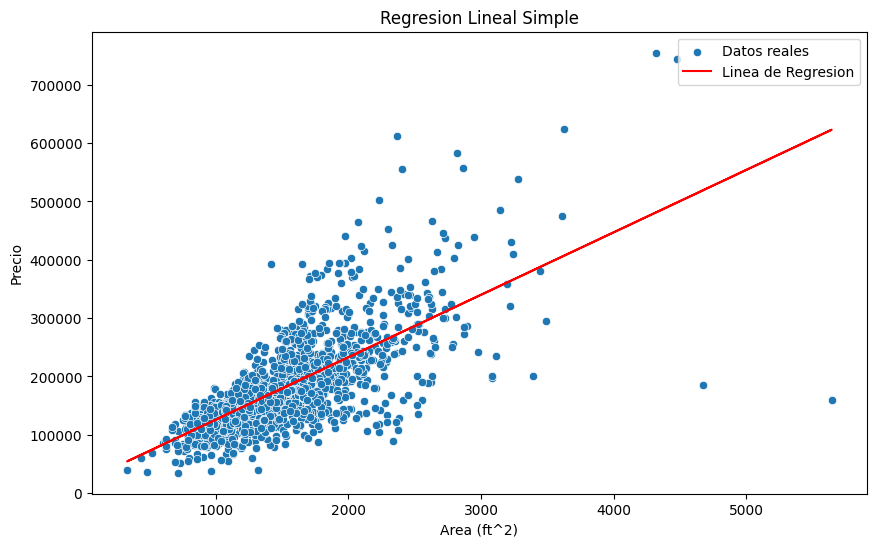

In [56]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = df['GrLivArea'], y = df['SalePrice'], label = 'Datos reales')
plt.plot(df['GrLivArea'], modelo.predict(X), color = 'red', label = 'Linea de Regresion')
plt.xlabel('Area (ft^2)')
plt.ylabel('Precio')
plt.title('Regresion Lineal Simple')
plt.legend()
plt.show()

# 4. Desarrollo del análisis (Regresión Lineal Múltiple)


## 4.1. Evaluación de todas las variables

In [52]:
#Se agregan todas las variables independientes para evaluar las metricas estadisticas
X = df[['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea']]
y = df['SalePrice']
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     714.8
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        02:30:40   Log-Likelihood:                -17751.
No. Observations:                1460   AIC:                         3.551e+04
Df Residuals:                    1455   BIC:                         3.554e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.43e+04   4045.103     -6.006      

### 4.1.2. Resultados obtenidos

Basado en las métricas obtenidas, podemos inferir lo siguiente:

*   El modelo describe en un 66.3% nuestros datos (el numero de variables no influye en gran medida a este %).

*   Dado que el p-value es menor a 0.05, podemos rechazar la hipótesis nula y concluir que el modelo es estadísticamente significativo. Esto indica que las áreas consideradas explican de forma significativa el precio de las casas.

*   El area del lote (LotArea) tiene un p > 0.05, por lo que podemos inferir que no contribuye a explicar el precio de las casas.





## 4.2. Evaluación de las variables que explican significativamente la variable dependiente (Precio)

In [54]:
#Se agregan todas las variables independientes para probar
X = df[['TotalBsmtSF', 'GrLivArea', 'GarageArea']]
y = df['SalePrice']
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())
print(modelo.params)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     951.1
Date:                Sun, 06 Jul 2025   Prob (F-statistic):               0.00
Time:                        02:30:54   Log-Likelihood:                -17752.
No. Observations:                1460   AIC:                         3.551e+04
Df Residuals:                    1456   BIC:                         3.553e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.411e+04   4045.540     -5.959      

### 4.2.2. Resultados obtenidos

Basado en las métricas obtenidas, podemos inferir lo siguiente:

*   El modelo describe en un 66.2% nuestros datos.

*   El modelo no se vio alterado en gran medida al eliminar la variable LotArea, esto corrobora que no es estadísticamente significativa para este caso.



# 5. Representación gráfica de los resultados (RLM)


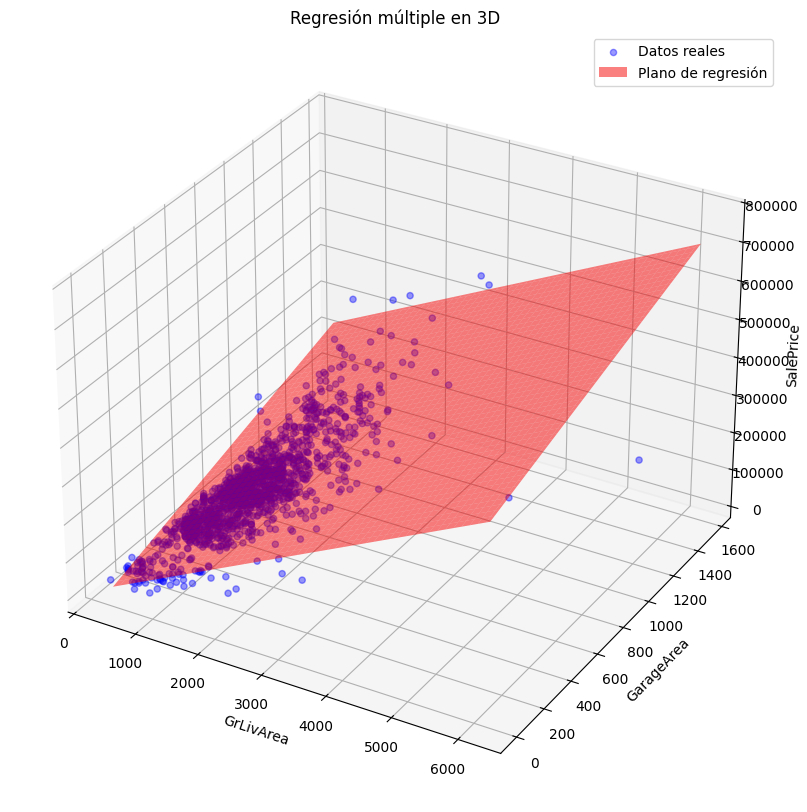

In [71]:
# Debido a la complejidad de representar graficamente una modelo de multiples variables, se hara un grafico 3D
# como ejemplo considerando solo 3 variables

X = df[['GrLivArea', 'GarageArea']] #se elimina 1 de las variables independientes para poder hacer un grafico 3D
X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()
b0, b1, b2 = modelo.params

x_surf, y_surf = np.meshgrid(
    np.linspace(X['GrLivArea'].min()*1.1, X['GrLivArea'].max()*1.1, 100),
    np.linspace(X['GarageArea'].min()*1.1, X['GarageArea'].max()*1.1, 100)
)

z_surf = b0 + b1 * x_surf + b2 * y_surf

fig = plt.figure(figsize=(12, 10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X['GrLivArea'], X['GarageArea'], y, color='blue', alpha=0.4, label='Datos reales')

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5, label='Plano de regresión')

ax.set_xlabel('GrLivArea')
ax.set_ylabel('GarageArea')
ax.set_zlabel('SalePrice')
ax.set_title('Regresión múltiple en 3D')

plt.legend()
plt.show()